In [121]:
# import Matplot lib
%matplotlib inline

import matplotlib.pyplot as plt

In [122]:
#Import sklearn metrics being used
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

# linear regression, regression models, preprocessing features used
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Normalizer, PolynomialFeatures, scale
from sklearn.cross_validation import train_test_split

import pandas as pd

In [123]:
# Importing the dataset
dataset = pd.read_csv('data/testData0.csv', sep=";")
# print(dataset.describe())

In [124]:
# Do correlation in features:
corrMatrix=dataset.corr()
print corrMatrix

          a         b         c         t
a  1.000000  0.046432  0.001251  0.034032
b  0.046432  1.000000 -0.010648  0.679699
c  0.001251 -0.010648  1.000000  0.008277
t  0.034032  0.679699  0.008277  1.000000


In [125]:
chosed_fields = ['a', 'b', 'c']
X = dataset[chosen_fields]
y = dataset[['t']]

# to check p-value and t-values for features to check if they're important
print f_regression(X,y)

# Normalize the input features values
X[chosen_fields] = scale(X)

(array([  1.15720403e+00,   8.56985905e+02,   6.83707595e-02]), array([  2.82306141e-001,   1.71245371e-136,   7.93777842e-001]))


/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [126]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [127]:
# try out different algorithms
# cv = StratifiedKFold(n_folds=5, random_state=0)

regressor_lo = Lasso(alpha=1)

regressor_gbr = GradientBoostingRegressor(loss='ls', alpha=0.6,
                                n_estimators=200, max_depth=3,
                                learning_rate=0.5, min_samples_leaf=9,
                                min_samples_split=5)
# Mean squared error: 280752.93
# Variance score: 0.48

regressor_li = LinearRegression()

regressor = Ridge(alpha=1e-2, normalize=True, solver='cholesky')

In [128]:
regressor.fit(X_train, y_train,)

# Predicting the Test set result
y_pred = regressor.predict(X_test)


# print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Check how well your model fits around mean of 
y_pred_train = regressor.predict(X_train)
print r2_score(y_train, y_pred_train)

Mean squared error: 407610.38
0.493346431565


In [129]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Regressor variables
print ( "Coefficients :" , regressor.coef_)
print ("Intercept :" , regressor.intercept_)

Variance score: 0.39
('Coefficients :', array([[  -2.92515604,  489.51480854,    4.59387508]]))
('Intercept :', array([ 1161.00480997]))


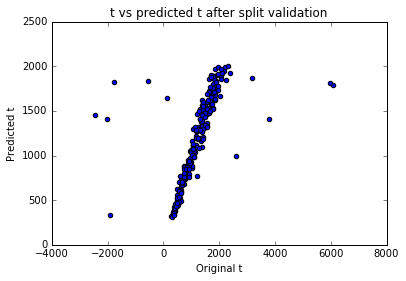

In [130]:
#see the model fit
plt.scatter(y_test, y_pred)
plt.title("t vs predicted t after split validation")
plt.xlabel("Original t")
plt.ylabel("Predicted t")

In [132]:
predicted_df = X_test
predicted_df['t'] = y_test
predicted_df['t_pred'] = y_pred

print predicted_df[['t', 't_pred']]

           t       t_pred
507  1354.47  1159.075808
818  1172.20  1099.577619
452  1386.10  1625.630323
368  1721.86  1574.527234
242   592.99   522.193039
929  1881.71  1726.182742
262   570.28   618.251115
810   652.00   727.434412
318   563.42   521.665193
49   1463.15  1469.883780
446 -1909.57   332.216075
142   560.96   478.713312
968  2391.74  1924.963640
345  1574.32  1367.320910
971   568.70   704.935072
133 -1763.78  1824.080525
104   789.33   809.210559
6    1089.74  1013.961692
600  1552.30  1329.835455
496  1473.89  1513.122630
702  1432.61  1202.617191
472  1048.26  1095.827457
598  1059.42  1121.540622
502  3168.16  1873.856663
433  1066.40  1015.903391
119   963.91   858.986617
108   568.94   485.741964
647  1202.83  1461.508072
589  1852.75  1965.347116
374   778.97   763.462080
..       ...          ...
309   739.55   799.924908
892   917.57   760.977538
301  1968.94  1775.648824
920   807.48   848.638319
594   971.05   917.097708
761   572.03   483.539053
107  2075.30

/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/techkriti/Projects/Kaggle/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [134]:
# Write the final DF to test set
import pickle
filename = 'data/testData0.model'
pickle.dump(regressor, open(filename, 'wb'))


In [120]:
# To predict a new file use this - regressor.predict(data)